In [1]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

In [5]:
web_features1 = []
web_features0 = []
tmp = []

for batch in range(0,100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

#print('content feature')
#print(web_features1)
#print(web_features0)
#print(len(web_features1))
#print(len(web_features0))


web_not_working = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Empty']
web_not_english = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Non-EN']
web_not = [ind for ind,ft in enumerate(web_features1) if len(ft) <=9]
#print(web_features1[1])
web_features1 = [ft for ft in web_features1 if len(ft) >9]



unwhite_tb = pd.DataFrame(web_features1)
unwhite_tb['label'] = 1

#print(web_features0)
web_not_working2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Empty']
web_not_english2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Non-EN']
web_features0 = [ft for ft in web_features0 if len(ft) >9]


white_tb = pd.DataFrame(web_features0)
white_tb['label'] = 0

#print(len(web_features1))
#print(len(web_features0))

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True)

X1 = all_tb.loc[:, all_tb.columns != 'label']
y1 = all_tb.loc[:, all_tb.columns == 'label']

In [6]:
len(web_features1[0])

17

In [7]:
len(web_features0[0])

17

In [8]:
web_features0[0]

[23.12,
 13.6,
 13.6,
 14.49,
 12.06,
 12.8,
 18,
 10.833333333333334,
 14.09,
 3.61,
 10044.125,
 13,
 1,
 1,
 1,
 1,
 -1]

In [9]:
y1['label'].tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [10]:
np.mean(y1)

label    0.336087
dtype: float64

In [11]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

In [12]:
clf.fit(X1,y1)

<ipython-input-12-02e4c239c946>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X1,y1)


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [13]:
clf.feature_importances_

array([0.05339746, 0.04099378, 0.02234982, 0.05416652, 0.06656634,
       0.04416631, 0.05186088, 0.05810395, 0.04954916, 0.06243036,
       0.18732056, 0.1905198 , 0.02889845, 0.04245187, 0.01978851,
       0.02743622, 0.        ])

<ipython-input-10-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-10-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-10-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-10-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-10-33b90ae4a0ac>:12: Data

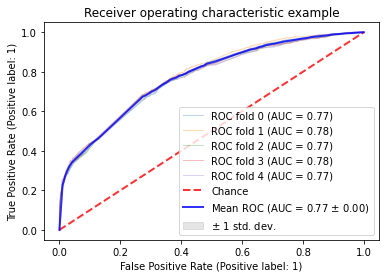

In [10]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [11]:
np.std([0.77,0.78,0.77,0.78,0.77])

0.004898979485566361

<ipython-input-13-65b716861c46>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-13-65b716861c46>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-13-65b716861c46>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-13-65b716861c46>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-13-65b716861c46>:12: Data

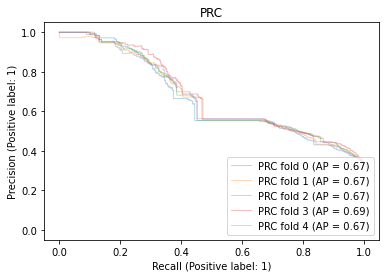

In [13]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [14]:
np.std([0.67,0.67,0.67,0.69,0.67])

0.007999999999999962

In [21]:
np.mean([0.67,0.67,0.67,0.69,0.67])

0.674

In [14]:
import numpy as np

In [15]:
abs_features1 = []
abs_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        #print(tmp)
        dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        #print(dat)
        abs_features1 += [np.mean(np.array(t), axis=0) for t in dt]

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        
        abs_features0 += [np.mean(np.array(t), axis=0) for t in dt]

#print('abstract feature')
#print(abs_features1)
#print(abs_features0)
#print(len(abs_features1))
#print(len(abs_features0))


#abs_features1 = [np.mean(np.array(ft), axis=0) for ft in abs_features1 if len([f for f in ft if len(f) == 10]) > 0]



unwhite_tb = pd.DataFrame(abs_features1)
unwhite_tb['label'] = 1

#abs_features0 = [np.mean(np.array(ft), axis=0) for ft in abs_features0 if len([f for f in ft if len(f) == 10]) > 0]


white_tb = pd.DataFrame(abs_features0)
white_tb['label'] = 0

#print(len(abs_features1))
#print(abs_features1)
#print(len(abs_features0))

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True)

X1 = all_tb.loc[:, all_tb.columns != 'label']
y1 = all_tb.loc[:, all_tb.columns == 'label']

In [43]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

,0,1,2,3,4,5,6,7,8,9
0,-1124.440000,170.800000,0.000000,88.520000,14.310000,74.300000,1.000000,2.000000,14.530000,0.280000
1,39.650000,12.200000,13.840000,13.550000,10.220000,13.460000,49.000000,12.438095,12.844000,14.568000
2,-35.130000,19.400000,0.000000,14.240000,13.360000,10.300000,2.000000,1.500000,2.000000,0.350000
3,-109.240000,29.200000,0.000000,11.150000,14.310000,9.900000,1.000000,0.500000,1.200000,0.240000
4,-50.334286,27.914286,7.785714,16.432857,14.842857,28.528571,37.428571,10.183333,16.652857,11.934286
...,...,...,...,...,...,...,...,...,...,...
5686,24.110000,17.400000,17.100000,16.080000,11.700000,21.300000,40.000000,16.750000,17.330000,10.340000
5687,-387.400000,67.800000,0.000000,-7.410000,0.100000,-1.700000,0.000000,0.000000,0.800000,0.090000
5688,36.620000,8.400000,0.000000,1.000000,19.480000,16.800000,1.000000,-0.500000,0.400000,0.120000
5689,7.073333,17.333333,12.783333,16.056667,11.091667,17.866667,45.666667,11.761905,17.301667,15.206667


In [16]:
clf.fit(X1,y1)

<ipython-input-16-02e4c239c946>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X1,y1)


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [17]:
clf.feature_importances_

array([0.0984185 , 0.09832792, 0.06987827, 0.09933977, 0.08572095,
       0.10394539, 0.10691568, 0.10336979, 0.12804754, 0.10603617])

<ipython-input-17-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-17-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-17-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-17-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-17-33b90ae4a0ac>:12: Data

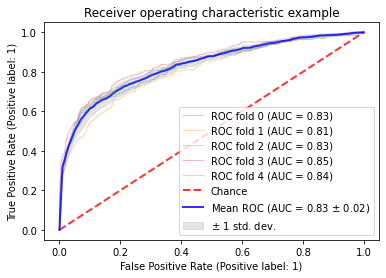

In [17]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

<ipython-input-18-d4fcd02fdcb0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-18-d4fcd02fdcb0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-18-d4fcd02fdcb0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-18-d4fcd02fdcb0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-18-d4fcd02fdcb0>:12: Data

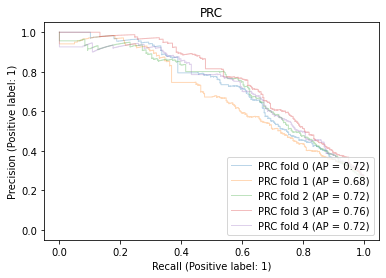

In [18]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [19]:
np.std([0.72,0.68,0.72,0.76,0.72])

0.02529822128134702

In [20]:
np.mean([0.72,0.68,0.72,0.76,0.72])

0.72

In [18]:
#drop two duplicated columns: save value but different column name
bibilometrics = pd.read_csv('labeled_journals_biblio_features_all.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [20]:
bibilometrics.columns

Index(['JournalId', 'NormalizedName', 'Issn', 'Reason',
       'num_journal_publication', 'num_journal_author',
       'num_journal_affiliation', 'journal_year_first_publish',
       'journal_avg_hindex', 'journal_avg_first_author_hindex',
       'journal_avg_last_author_hindex', 'journal_avg_middle_author_hindex',
       'total_num_journal_reference', 'total_num_journal_cited',
       'journal_paper_reference_num', 'journal_journal_cited_num',
       'journal_num_author_referenced', 'journal_num_author_cited',
       'journal_num_affiliation_referenced', 'journal_num_affiliation_cited',
       'journal_num_journal_self_reference',
       'journal_num_author_self_reference',
       'journal_num_affiliation_self_reference',
       'journal_num_journal_self_cited', 'journal_num_author_self_cited',
       'journal_num_affiliation_self_cited'],
      dtype='object')

In [21]:
bibilometrics.head(3)

,JournalId,NormalizedName,Issn,Reason,num_journal_publication,num_journal_author,num_journal_affiliation,journal_year_first_publish,journal_avg_hindex,journal_avg_first_author_hindex,...,journal_num_author_referenced,journal_num_author_cited,journal_num_affiliation_referenced,journal_num_affiliation_cited,journal_num_journal_self_reference,journal_num_author_self_reference,journal_num_affiliation_self_reference,journal_num_journal_self_cited,journal_num_author_self_cited,journal_num_affiliation_self_cited
0,2764959905,austrian journal of humanities and social scie...,Unknown,A,1364,48,48,2012,1.000000,1.000000,...,122,83,28,12,0,0,0,0,1,0
1,2764494681,austrian journal of technical and natural scie...,Unknown,A,826,36,36,2014,1.880952,2.058824,...,193,214,52,21,0,1,0,0,3,0
2,2764967488,european journal of arts,Unknown,A,372,5,5,2015,1.000000,1.000000,...,13,7,2,1,0,0,0,0,0,0


In [22]:
white_bib = bibilometrics[bibilometrics['Reason'] == 'Still in DOAJ index'].drop(columns=['JournalId', 'NormalizedName','Issn','Reason'])
white_bib['label'] = 0
unwhite_bib = bibilometrics[bibilometrics['Reason'] != 'Still in DOAJ index'].drop(columns=['JournalId', 'NormalizedName','Issn','Reason'])
unwhite_bib['label'] = 1

In [23]:
all_tb = pd.concat([unwhite_bib,white_bib]).reset_index(drop=True)

X6 = all_tb.loc[:, all_tb.columns != 'label']
y6 = all_tb.loc[:, all_tb.columns == 'label']

In [24]:
all_tb.shape

(5783, 23)

In [27]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

,num_journal_publication,num_journal_author,num_journal_affiliation,journal_year_first_publish,journal_avg_hindex,journal_avg_first_author_hindex,journal_avg_last_author_hindex,journal_avg_middle_author_hindex,total_num_journal_reference,total_num_journal_cited,...,journal_num_author_referenced,journal_num_author_cited,journal_num_affiliation_referenced,journal_num_affiliation_cited,journal_num_journal_self_reference,journal_num_author_self_reference,journal_num_affiliation_self_reference,journal_num_journal_self_cited,journal_num_author_self_cited,journal_num_affiliation_self_cited
0,1364,48,48,2012,1.000000,1.000000,0.002933,0.000000,70,40,...,122,83,28,12,0,0,0,0,1,0
1,826,36,36,2014,1.880952,2.058824,0.012107,0.023898,61,80,...,193,214,52,21,0,1,0,0,3,0
2,372,5,5,2015,1.000000,1.000000,0.002688,0.000000,10,13,...,13,7,2,1,0,0,0,0,0,0
3,309,57,57,2013,3.791667,4.000000,0.119741,0.072635,105,9,...,459,28,112,6,0,1,0,0,1,1
4,460,16,16,2015,1.833333,1.666667,0.034783,0.255952,36,52,...,56,104,20,20,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,31,0,0,2003,18.333333,16.500000,2.677419,2.000000,0,16,...,0,25,0,14,0,0,0,0,0,0
5779,403,200,200,1940,3.238462,4.272727,0.124069,0.076713,738,113,...,5644,408,695,55,0,4,1,0,1,1
5780,890,2317,2317,1996,4.116827,3.513382,1.707865,1.838533,10467,1168,...,24925,2523,1818,230,234,307,4,212,197,1
5781,812,846,846,2003,5.047909,5.076613,1.697044,1.226886,4389,525,...,19898,1679,1871,164,20,70,48,24,73,61


In [28]:
clf.fit(X6,y6)

<ipython-input-28-a264d11f1d61>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X6,y6)


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [29]:
clf.feature_importances_

array([0.04126088, 0.03856128, 0.03824246, 0.06335027, 0.04089603,
       0.03703528, 0.05255757, 0.04789848, 0.03483732, 0.0416444 ,
       0.03341694, 0.06462511, 0.03831904, 0.04364247, 0.03891112,
       0.06452335, 0.03445432, 0.03198338, 0.06567102, 0.03745596,
       0.03560138, 0.07511196])

<ipython-input-16-a456f11139c0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-16-a456f11139c0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-16-a456f11139c0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-16-a456f11139c0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-16-a456f11139c0>:12: Data

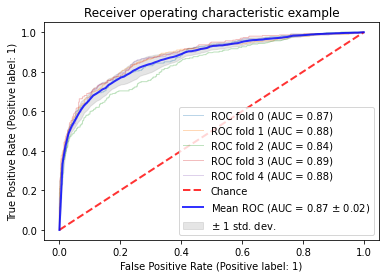

In [16]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X6, y6)):
    classifier.fit(X6.iloc[train], y6.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X6.iloc[test],
        y6.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

<ipython-input-19-a10fdbacf979>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-19-a10fdbacf979>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-19-a10fdbacf979>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-19-a10fdbacf979>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-19-a10fdbacf979>:12: Data

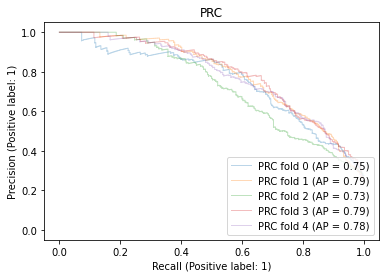

In [19]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X6, y6)):
    classifier.fit(X6.iloc[train], y6.iloc[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X6.iloc[test],
        y6.iloc[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [20]:
np.mean([0.75,0.79,0.73,0.79,0.78])

0.768

In [21]:
np.std([0.75,0.79,0.73,0.79,0.78])

0.02400000000000002

In [56]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

print('tag feature')
print(len(tag_features1))
#print(tag_features1)
print(len(tag_features0))
#print(tag_features0)

tag_features1 = [ft for ind,ft in enumerate(tag_features1) if len(ft) >1]
tag_features0 = [ft for ind,ft in enumerate(tag_features0) if len(ft) >1]

print(len(tag_features1))
print(len(tag_features0))

data = tag_features1 + tag_features0
label = [1 for ft in tag_features1] + [0 for ft in tag_features0]



vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(data)
y2 = np.array(label)

tag feature
5375
13977
5198
13826


In [57]:
pickle.dump(vectorizer, open('webtag_tfidf', 'wb'))

In [58]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X2, y2)
pickle.dump(classifier, open('webtag_classifer', 'wb'))

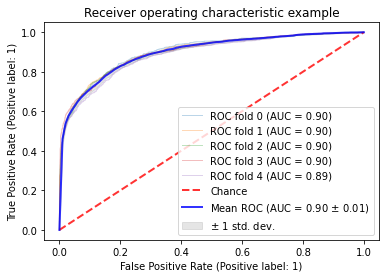

In [26]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

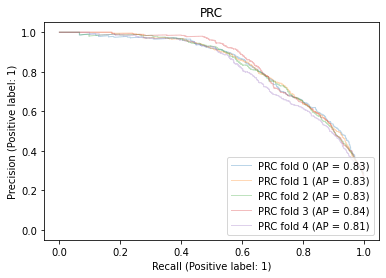

In [27]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [28]:
np.mean([0.83,0.83,0.83,0.84,0.81])

0.828

In [29]:
np.std([0.83,0.83,0.83,0.84,0.81])

0.00979795897113268

In [10]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)

print('font feature')
print(len(font_features1))
print(len(font_features0))
font_feature1 = [ft for ind,ft in enumerate(font_features1) if len(ft) > 0]
font_feature0 = [ft for ind,ft in enumerate(font_features0) if len(ft) > 0]
font_feature = font_feature1 + font_feature0
label = [1 for ft in font_feature1] + [0 for ft in font_feature0]

print(len(font_feature1))
print(len(font_feature0))

vectorizer = TfidfVectorizer()
X3 = vectorizer.fit_transform([' '.join(ff) for ff in font_feature])
y3 = np.array(label)

font feature
5375
13977
2277
6749


In [656]:
#pickle.dump(vectorizer, open('webfont_tfidf', 'wb'))

In [32]:
len(font_feature)

9026

In [33]:
len(label)

9026

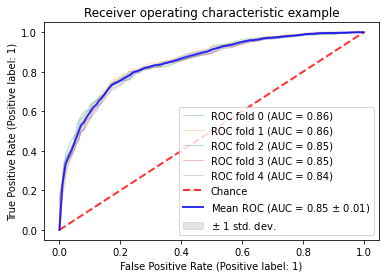

In [34]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

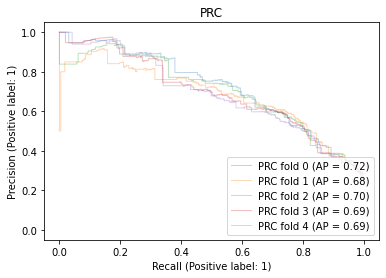

In [36]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [37]:
np.mean([0.72,0.68,0.70,0.69,0.69])

0.696

In [38]:
np.std([0.72,0.68,0.70,0.69,0.69])

0.013564659966250522

In [11]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

print('color feature')
print(color_features1)
print(color_features0)
color_features1 = [ft for ind,ft in enumerate(color_features1) if len(ft) ==5]
color_features0 = [ft for ind,ft in enumerate(color_features0) if len(ft) ==5]
website_colors = color_features1 + color_features0
label = [1 for ft in color_features1] + [0 for ft in color_features0]


vectorizer = TfidfVectorizer()
X4 = vectorizer.fit_transform([' '.join(set(ff)) for ff in website_colors])
y4 = np.array(label)

color feature
[['None'], ['None'], ['None'], ['None'], ['None'], ['None'], ['None'], ['None'], ['None'], ['None'], ['None'], ['None'], ['None'], ['white', 'steelblue', 'gold', 'black', 'wheat'], ['white', 'steelblue', 'goldenrod', 'darkslategray', 'wheat'], ['white', 'lightseagreen', 'gold', 'darkolivegreen', 'wheat'], ['white', 'steelblue', 'gold', 'black', 'silver'], ['white', 'steelblue', 'gold', 'palegoldenrod', 'darkslategray'], ['white', 'lightseagreen', 'goldenrod', 'maroon', 'wheat'], ['white', 'steelblue', 'gold', 'black', 'palegoldenrod'], ['white', 'gold', 'steelblue', 'lightgray', 'black'], ['white', 'lightseagreen', 'gold', 'black', 'wheat'], ['white', 'steelblue', 'gold', 'silver', 'maroon'], ['white', 'steelblue', 'gold', 'wheat', 'darkslategray'], ['white', 'darkslategray', 'silver', 'black', 'gray'], ['snow', 'gray', 'silver', 'gainsboro', 'darkslategray'], ['None'], ['None'], ['None'], ['None'], ['None'], ['darkslategray', 'snow', 'darkslategray', 'darkgray', 'black']

In [658]:
#pickle.dump(vectorizer, open('webcolor_tfidf', 'wb'))

In [46]:
len(website_colors)

18530

In [47]:
len(label)

18530

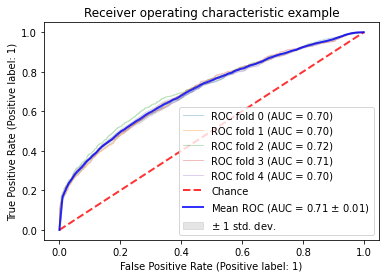

In [48]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20, n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X4, y4)):
    classifier.fit(X4[train], y4[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X4[test],
        y4[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

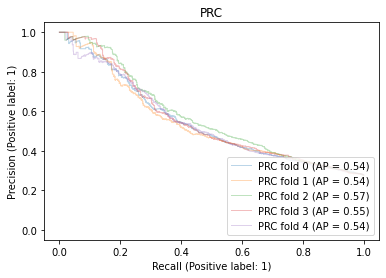

In [49]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X4, y4)):
    classifier.fit(X4[train], y4[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X4[test],
        y4[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [50]:
np.mean([0.54,0.54,0.57,0.55,0.54])

0.548

In [51]:
np.std([0.54,0.54,0.57,0.55,0.54])

0.01166190378969057

In [37]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import roc_auc_score

<ipython-input-54-8556b4541887>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-54-8556b4541887>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

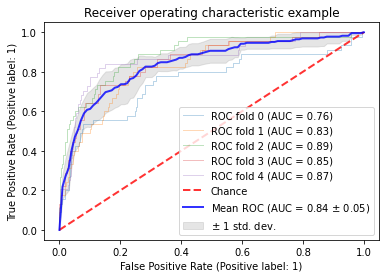

In [54]:
cv = StratifiedKFold(n_splits=5)
classifier1 = RandomForestClassifier(max_depth=5, random_state=0)
classifier2 = RandomForestClassifier(max_depth=5, random_state=0)
classifier3 = RandomForestClassifier(max_depth=5, random_state=0)
classifier4 = RandomForestClassifier(max_depth=5, random_state=0)
classifier = LogisticRegression(random_state=0)
#classifier = RandomForestClassifier(max_depth = 10,n_estimators =500, random_state=0)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
   
    XX = []
    clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
    F1 = clf1.predict_proba(X1.iloc[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F1))
    clf2 = classifier2.fit(X2[train], y2[train])
    F2 = clf2.predict_proba(X2[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F2))
    clf3 = classifier3.fit(X3[train], y3[train])
    F3 = clf3.predict_proba(X3[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F3))
    clf4 = classifier4.fit(X4[train], y4[train])
    F4 = clf4.predict_proba(X4[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F4))
    
    XX0 = []
    X01 = clf1.predict_proba(X1.iloc[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X01))
    X02 = clf2.predict_proba(X2[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X02))
    X03 = clf3.predict_proba(X3[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X03))
    X04 = clf4.predict_proba(X4[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X04))
    
    for ind, xx in enumerate(F1):
        #XX.append([F1[ind],F2[ind],F3[ind]])
        XX.append([F1[ind],F2[ind],F3[ind],F4[ind]])
        #XX.append([F1[ind]])
    
    for ind, xx in enumerate(X01):
        #XX0.append([X01[ind],X02[ind],X03[ind]])
        XX0.append([X01[ind],X02[ind],X03[ind],X04[ind]])
        #XX0.append([X01[ind]])
        
    
    
    classifier.fit(XX, np.array(y1)[train])
    #print(classifier.coef_)
    #print(len(XX0))
    #print(np.array(XX0)[test])
    
    viz = RocCurveDisplay.from_estimator(
        classifier,
        np.array(XX0),
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

# Connect different features into one feature to predict

In [22]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [23]:
web_features1 = []
web_features0 = []

for batch in range(0,100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

In [24]:
abs_features1 = []
abs_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        for t in tmp:
            #print(t)
            if len(t) == 2 and len(t[1]) == 0:
                dt = [0]
            elif len(t) !=0:
                tt = []
                for c in t:
                    if len(c) == 10:
                        tt.append(c)
                   
                #print(tt)
                if len(tt) != 0:
                    dt = np.mean(np.array(tt), axis=0)
                else:
                    dt = [0]
                #print(len(dt))
            abs_features1.append(dt)
            
        #dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        #print(dat)
        #abs_features1 += [np.mean(np.array(t), axis=0) for t in dt]

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'_abs.pkl', 'rb') as f:
    
        tmp = pickle.load(f)
     
        for t in tmp:
            #print(t)
            if len(t) == 2 and len(t[1]) == 0:
                dt = [0]
            elif len(t) !=0:
                tt = []
                for c in t:
                    if len(c) == 10:
                        tt.append(c)
              
                #print(tt)
                if len(tt) != 0:
                    dt = np.mean(np.array(tt), axis=0)
                else:
                    dt = [0]
                #print(len(dt))
                
            abs_features0.append(dt)
        
    
        
        #dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        
        #abs_features0 += [np.mean(np.array(t), axis=0) for t in dt]


In [25]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

In [26]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)


In [27]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

In [28]:
len(web_features1),len(web_features0),

(5375, 13977)

In [29]:
len(abs_features1),len(abs_features0),

(5375, 13977)

In [30]:
len(tag_features1),len(tag_features0),

(5375, 13977)

In [31]:
len(font_features1),len(font_features0),

(5375, 13977)

In [32]:
len(color_features1),len(color_features0),

(5375, 13977)

In [33]:
#drop two duplicated columns: save value but different column name
bibilometrics = pd.read_csv('labeled_journals_biblio_features_all.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [34]:
bibilometrics.head(3)

,JournalId,NormalizedName,Issn,Reason,num_journal_publication,num_journal_author,num_journal_affiliation,journal_year_first_publish,journal_avg_hindex,journal_avg_first_author_hindex,...,journal_num_author_referenced,journal_num_author_cited,journal_num_affiliation_referenced,journal_num_affiliation_cited,journal_num_journal_self_reference,journal_num_author_self_reference,journal_num_affiliation_self_reference,journal_num_journal_self_cited,journal_num_author_self_cited,journal_num_affiliation_self_cited
0,2764959905,austrian journal of humanities and social scie...,Unknown,A,1364,48,48,2012,1.000000,1.000000,...,122,83,28,12,0,0,0,0,1,0
1,2764494681,austrian journal of technical and natural scie...,Unknown,A,826,36,36,2014,1.880952,2.058824,...,193,214,52,21,0,1,0,0,3,0
2,2764967488,european journal of arts,Unknown,A,372,5,5,2015,1.000000,1.000000,...,13,7,2,1,0,0,0,0,0,0


In [35]:
white_bib = bibilometrics[bibilometrics['Reason'] == 'Still in DOAJ index'].drop(columns=['JournalId','Issn','NormalizedName','Reason'])
white_bib['label'] = 0
unwhite_bib = bibilometrics[bibilometrics['Reason'] != 'Still in DOAJ index'].drop(columns=['JournalId','Issn','NormalizedName','Reason'])
unwhite_bib['label'] = 1

In [36]:
white_bib.shape

(4281, 23)

In [37]:
unwhite_bib.shape

(1502, 23)

In [39]:
labeled_journals = pd.read_csv('merge_journal_list_interesting_url_all_unique_normalizedname.csv')

In [40]:
labeled_journals.head(3)

,Journal Title,ISSN,Reason,Journal Title Normalized,URL,Data Source,added,Remove_Date,Add_Date,reason_category
0,Journal of Algebraic Systems,NaN,Still in DOAJ index,journal of algebraic systems,http://jas.shahroodut.ac.ir/,DOAJ,1.0,1300-01-01 00:00:00,2019-01-26 00:00:00,interesting reason
1,Revista Pró-UniverSUS,NaN,Still in DOAJ index,revista pró-universus,http://editora.universidadedevassouras.edu.br/...,DOAJ,1.0,1300-01-01 00:00:00,2019-05-08 00:00:00,interesting reason
2,Austrian Journal of Humanities and Social Scie...,Unknown,A,austrian journal of humanities and social scie...,https://ew-a.org/journals/61/,Gray OA,NaN,NaN,NaN,interesting reason


In [41]:
labeled_journals.shape

(19352, 10)

In [43]:
bib_features0 = []
bib_features_ind0 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] == 'Still in DOAJ index'].iterrows():
    if row['Journal Title Normalized'] in (bibilometrics['NormalizedName'].tolist()):
        tmp = bibilometrics.index[bibilometrics['NormalizedName']==row['Journal Title Normalized']]
        #print(tmp)
        val = bibilometrics.iloc[tmp].drop(columns=['JournalId','Issn','NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features0.append(val)
        bib_features_ind0.append(counter)
    else:
        bib_features0.append([0]*22)
    counter += 1
        


22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
2

22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
2

In [44]:
counter

13977

In [45]:
len(bib_features_ind0)

4255

In [46]:
bib_features1 = []
bib_features_ind1 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] != 'Still in DOAJ index'].iterrows():
    if row['Journal Title Normalized'] in (bibilometrics['NormalizedName'].tolist()):
        tmp = bibilometrics.index[bibilometrics['NormalizedName']==row['Journal Title Normalized']]
        #print(tmp)
        val = bibilometrics.iloc[tmp].drop(columns=['JournalId','Issn','NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features1.append(val)
        bib_features_ind1.append(counter)
    else:
        bib_features1.append([0]*22)
    counter += 1

In [47]:
counter

5375

In [48]:
len(bib_features0),len(bib_features1)

(13977, 5375)

In [49]:
web_features_ind0 = [ind for ind,ft in enumerate(web_features0) if len(ft) >9]
web_features_ind1 = [ind for ind,ft in enumerate(web_features1) if len(ft) >9]

In [50]:
abs_features_ind0 = [ind for ind,ft in enumerate(abs_features0) if len(ft) >9]
abs_features_ind1 = [ind for ind,ft in enumerate(abs_features1) if len(ft) >9]

In [51]:
tag_features_ind0 = [ind for ind,ft in enumerate(tag_features0) if len(ft) >1]
tag_features_ind1 = [ind for ind,ft in enumerate(tag_features1) if len(ft) >1]

In [52]:
font_features_ind0 = [ind for ind,ft in enumerate(font_features0) if len(ft) > 0]
font_features_ind1 = [ind for ind,ft in enumerate(font_features1) if len(ft) > 0]

In [53]:
color_features_ind0 = [ind for ind,ft in enumerate(color_features0) if len(ft) ==5]
color_features_ind1 = [ind for ind,ft in enumerate(color_features1) if len(ft) ==5]

In [54]:
len(bib_features_ind1),len(bib_features_ind0),

(1493, 4255)

In [55]:
len(web_features_ind1),len(web_features_ind0),

(4801, 9484)

In [56]:
len(abs_features_ind1),len(abs_features_ind0),

(3498, 6736)

In [57]:
len(tag_features_ind1),len(tag_features_ind0),

(5198, 13826)

In [58]:
len(font_features_ind1),len(font_features_ind0),

(2277, 6749)

In [59]:
len(color_features_ind1),len(color_features_ind0),

(5083, 13447)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
vectorizer = TfidfVectorizer()

In [62]:
web_features_use = []
bib_features_use = []
abs_features_use = []
tag_features_use = []
font_features_use = []
color_features_use = []
label = []

In [63]:
for ind,v in enumerate(zip(web_features0,bib_features0,abs_features0,tag_features0,font_features0,color_features0)):
    w = v[0]
    b = v[1]
    a = v[2]
    t = v[3]
    f = v[4]
    c = v[5]
    if ind in web_features_ind0 and ind in bib_features_ind0 and ind in abs_features_ind0 and ind in tag_features_ind0 and ind in font_features_ind0 and ind in color_features_ind0:
        web_features_use.append(w)
        bib_features_use.append(b)
        abs_features_use.append(a)
        tag_features_use.append(t)
        font_features_use.append(f)
        color_features_use.append(c)
        label.append(0)

In [64]:
len(web_features_use)

1345

In [65]:
for ind,v in enumerate(zip(web_features1,bib_features1,abs_features1,tag_features1,font_features1,color_features1)):
    w = v[0]
    b = v[1]
    a = v[2]
    t = v[3]
    f = v[4]
    c = v[5]
    if ind in web_features_ind1 and ind in bib_features_ind1 and ind in abs_features_ind1 and ind in tag_features_ind1 and ind in font_features_ind1 and ind in color_features_ind1:
        web_features_use.append(w)
        bib_features_use.append(b)
        abs_features_use.append(a)
        tag_features_use.append(t)
        font_features_use.append(f)
        color_features_use.append(c)
        label.append(1)

In [66]:
len(web_features_use)

1739

In [67]:
content_x = web_features_use

In [68]:
bib_x = bib_features_use

In [69]:
abstract_x = abs_features_use

In [70]:
tag_x = vectorizer.fit_transform(tag_features_use).todense()

In [71]:
len(tag_x[0].tolist()[0])

308

In [72]:
font_x = vectorizer.fit_transform([' '.join(set(ff)) for ff in font_features_use]).todense()

In [73]:
color_x = vectorizer.fit_transform([' '.join(set(ff)) for ff in color_features_use]).todense()

In [74]:
X = []

In [75]:
abstract_x[0].tolist()

[20.05,
 17.46,
 17.69,
 16.175000000000004,
 11.379000000000001,
 20.250000000000004,
 57.3,
 18.5025,
 18.433,
 15.619999999999996]

In [76]:
for ind,w in enumerate(web_features_use):
    X.append(w+bib_x[ind]+abstract_x[ind].tolist()+tag_x[ind].tolist()[0]+font_x[ind].tolist()[0]+color_x[ind].tolist()[0])

In [77]:
len(content_x)

1739

In [78]:
len(X)

1739

In [79]:
len(label)

1739

In [80]:
bib_x[0]

[34.0,
 158.0,
 158.0,
 2015.0,
 9.05501567398119,
 6.0,
 7.794117647058823,
 7.119501100751101,
 778.0,
 203.0,
 32.0,
 94.0,
 3021.0,
 867.0,
 491.0,
 254.0,
 3.0,
 15.0,
 12.0,
 3.0,
 6.0,
 7.0]

In [82]:
import numpy as np

In [83]:
X2 = np.array(X)
y2 = np.array(label)

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score

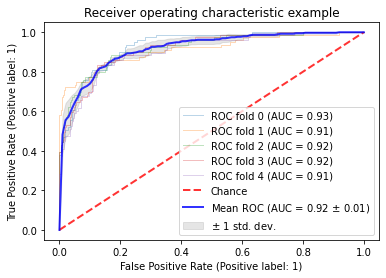

In [85]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [86]:
from sklearn.metrics import PrecisionRecallDisplay

#display = PrecisionRecallDisplay.from_estimator(
#    classifier, X_test, y_test, name="LinearSVC"
#)
#_ = display.ax_.set_title("2-class Precision-Recall curve")

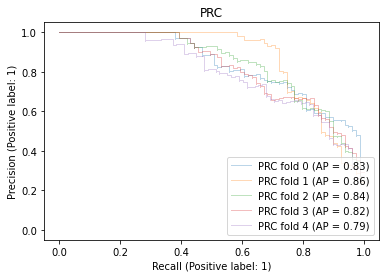

In [87]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [88]:
np.mean([0.83,0.86,0.84,0.82,0.79])

0.828

In [89]:
np.std([0.83,0.86,0.84,0.82,0.79])

0.023151673805580437

# Stack Models

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
content_train0, content_test, content_y0, content_ytest =  train_test_split(content_x, label, test_size = 0.2,random_state=6)
content_train1, content_train2,content_ytr1, content_ytr2 =  train_test_split(content_train0,content_y0, test_size = 0.5,random_state=6)

In [92]:
content_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(content_train1,content_ytr1)

In [93]:
content_input_x = content_classifier.predict_proba(content_train2)[:,1]

In [94]:
len(content_input_x)

696

In [95]:
np.mean(content_ytr2)

0.21839080459770116

In [96]:
bib_train0, bib_test, bib_y0, bib_ytest =  train_test_split(bib_x, label, test_size = 0.2,random_state=6)
bib_train1, bib_train2, bib_ytr1, bib_ytr2 =  train_test_split(bib_train0,bib_y0, test_size = 0.5,random_state=6)

In [97]:
bib_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(bib_train1,bib_ytr1)

In [98]:
bib_input_x = bib_classifier.predict_proba(bib_train2)[:,1]

In [99]:
len(bib_input_x)

696

In [100]:
abstract_train0, abstract_test, abstract_y0, abstract_ytest = train_test_split(abstract_x,label, test_size = 0.2,random_state=6)
abstract_train1, abstract_train2,abstract_ytr1, abstract_ytr2 = train_test_split(abstract_train0,abstract_y0, test_size = 0.5,random_state=6)

In [101]:
abstract_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(abstract_train1,abstract_ytr1)

In [102]:
abstract_input_x = abstract_classifier.predict_proba(abstract_train2)[:,1]

In [103]:
np.mean(abstract_ytr2)

0.21839080459770116

In [104]:
tag_train0, tag_test, tag_y0, tag_ytest =  train_test_split(tag_x, label, test_size = 0.2,random_state=6)
tag_train1, tag_train2,tag_ytr1, tag_ytr2 =  train_test_split(tag_train0,tag_y0, test_size = 0.5,random_state=6)

In [105]:
tag_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(tag_train1,tag_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [106]:
tag_input_x = tag_classifier.predict_proba(tag_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [107]:
np.mean(tag_ytr2)

0.21839080459770116

In [108]:
font_train0, font_test, font_y0, font_ytest =  train_test_split(font_x, label, test_size = 0.2,random_state=6)
font_train1, font_train2,font_ytr1, font_ytr2 =  train_test_split(font_train0,font_y0, test_size = 0.5,random_state=6)

In [109]:
font_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(font_train1,font_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [110]:
font_input_x = font_classifier.predict_proba(font_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [111]:
color_train0, color_test, color_y0, color_ytest =  train_test_split(color_x, label, test_size = 0.2,random_state=6)
color_train1, color_train2,color_ytr1, color_ytr2 =  train_test_split(color_train0,color_y0, test_size = 0.5,random_state=6)

In [112]:
color_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(color_train1,color_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [113]:
color_input_x = color_classifier.predict_proba(color_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
XX = []

In [116]:
for ind,w in enumerate(content_input_x):
    XX.append([w,bib_input_x[ind],abstract_input_x[ind], tag_input_x[ind], font_input_x[ind], color_input_x[ind]])

In [117]:
XX[0]

[0.138242118226601,
 0.104,
 0.22207999999999997,
 0.06199046594891478,
 0.13105724469859414,
 0.3020361233761805]

In [118]:
from sklearn.metrics import average_precision_score

In [119]:
clf = LogisticRegression(random_state=0).fit(XX, color_ytr2)
print(clf.classes_)
y_scores = clf.predict_proba(XX)[:,1]

[0 1]


In [120]:
clf.coef_

array([[1.46143223, 4.77287022, 1.94998765, 2.43894664, 1.28120173,
        0.64319018]])

In [121]:
#average_precision_score(color_ytr2, y_scores)

In [122]:
from sklearn.metrics import roc_auc_score

#roc_auc_score(color_ytr2, y_scores)

In [123]:
content_input_test_x = content_classifier.predict_proba(content_test)[:,1]

In [124]:
bib_input_test_x = bib_classifier.predict_proba(bib_test)[:,1]

In [125]:
abstract_input_test_x = abstract_classifier.predict_proba(abstract_test)[:,1]

In [126]:
tag_input_test_x = tag_classifier.predict_proba(tag_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [127]:
font_input_test_x = font_classifier.predict_proba(font_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [128]:
color_input_test_x = color_classifier.predict_proba(color_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [129]:
XXX = []

In [130]:
for ind,w in enumerate(content_input_test_x):
    XXX.append([w,bib_input_test_x[ind],abstract_input_test_x[ind], tag_input_test_x[ind], font_input_test_x[ind], color_input_test_x[ind]])

In [131]:
y_scores = clf.predict_proba(XXX)[:,1]

In [132]:
average_precision_score(color_ytest, y_scores)

0.8413852562159249

In [133]:
roc_auc_score(font_ytest, y_scores)

0.9194480102695763

In [134]:
roc_auc_score(color_ytest, y_scores)

0.9194480102695763

# Do predictions by year

In [1]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
web_features_use2 = []
bib_features_use2 = []
abstract_features_use2 = []
tag_features_use2 = []
font_features_use2 = []
color_features_use2 = []
label2 = []

In [4]:
web_features1 = []
web_features0 = []
tmp = []

for batch in range(0,100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

In [5]:
abs_features1 = []
abs_features0 = []


for batch in range(100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        #print(tmp)
        dt = []
        for t in tmp:
            if len(t) ==0:
                dt.append([[0] * 10])
            else:
                ttt = []
                for tt in t:
                    if len(tt) == 10:
                        ttt.append(tt)
                    else:
                        ttt.append([0] * 10)
                dt.append(ttt)

        abs_features1 += [np.mean(np.array(t), axis=0) for t in dt]
        
for batch in range(100):
    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        #print(tmp)
        dt = []
        for t in tmp:
            if len(t) ==0:
                dt.append([[0] * 10])
            else:
                ttt = []
                for tt in t:
                    if len(tt) == 10:
                        ttt.append(tt)
                    else:
                        ttt.append([0] * 10)
                dt.append(ttt)

        abs_features0 += [np.mean(np.array(t), axis=0) for t in dt]

In [6]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

In [7]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)


In [8]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

In [9]:
labeled_journals = pd.read_csv('merge_journal_list_interesting_url_all_unique_normalizedname.csv')
#drop two duplicated columns: save value but different column name
bibilometrics = pd.read_csv('labeled_journals_biblio_features_all.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [10]:
labeled_journals_paper = pd.read_csv('labeled_journal_paper_basic_info_v1.csv')

In [11]:
labeled_journals_paper.shape

(72581, 5)

In [12]:
labeled_journals_paper.head(5)

,JournalId,NormalizedName,Year,Reason,count
0,12644804,tumor biology,2016,Still in DOAJ index,1654
1,12644804,tumor biology,2013,Still in DOAJ index,485
2,12644804,tumor biology,2014,Still in DOAJ index,1553
3,12644804,tumor biology,1992,Still in DOAJ index,43
4,12644804,tumor biology,2018,Still in DOAJ index,529


In [13]:
labeled_journals_paper.groupby(['NormalizedName'])['Year'].agg(['min']).reset_index()

,NormalizedName,min
0,3c tic,2012
1,aace clinical case reports,2014
2,aaps open,2015
3,abril,2008
4,academia anatomica international,2015
...,...,...
4495,zoosystema,1997
4496,zoosystematics and evolution,1939
4497,âzyk i tekst,2016
4498,œconomia,2011


In [14]:
labeled_journals_firt_publication_year = labeled_journals_paper.groupby(['NormalizedName'])['Year'].agg(['min']).reset_index()

In [15]:
bib_features0 = []
bib_features_ind0 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] == 'Still in DOAJ index'].iterrows():
    if row['Journal Title Normalized'] in (bibilometrics['NormalizedName'].tolist()) and row['Journal Title Normalized'] in labeled_journals_firt_publication_year['NormalizedName'].tolist():
        tmp = bibilometrics.index[bibilometrics['NormalizedName']==row['Journal Title Normalized']]
        tmp2 = labeled_journals_firt_publication_year.index[labeled_journals_firt_publication_year['NormalizedName'] == row['Journal Title Normalized']]

        val = bibilometrics.iloc[tmp].drop(columns=['JournalId','Issn','NormalizedName','Reason']).values.tolist()[0]
        val2 = labeled_journals_firt_publication_year.iloc[tmp2].drop(columns=['NormalizedName']).values.tolist()[0]
        #print(len(val))
        bib_features0.append(val+val2)
        bib_features_ind0.append(counter)
    else:
        bib_features0.append([0]*23)
    counter += 1

In [16]:
bib_features0[:100]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [200.0,
  59.0,
  59.0,
  2012.0,
  2.4815040650406504,
  2.423076923076923,
  0.645,
  0.6174242424242424,
  90.0,
  94.0,
  18.0,
  28.0,
  245.0,
  249.0,
  40.0,
  53.0,
  0.0,
  3.0,
  0.0,
  0.0,
  4.0,
  0.0,
  2012],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [17]:
bib_features1 = []
bib_features_ind1 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] != 'Still in DOAJ index'].iterrows():
    if row['Journal Title Normalized'] in (bibilometrics['NormalizedName'].tolist()) and row['Journal Title Normalized'] in labeled_journals_firt_publication_year['NormalizedName'].tolist():
        tmp = bibilometrics.index[bibilometrics['NormalizedName']==row['Journal Title Normalized']]
        tmp2 = labeled_journals_firt_publication_year.index[labeled_journals_firt_publication_year['NormalizedName'] == row['Journal Title Normalized']]

        val = bibilometrics.iloc[tmp].drop(columns=['JournalId','Issn','NormalizedName','Reason']).values.tolist()[0]
        val2 = labeled_journals_firt_publication_year.iloc[tmp2].drop(columns=['NormalizedName']).values.tolist()[0]

        #print(len(val))
        bib_features1.append(val+val2)
        bib_features_ind1.append(counter)
    else:
        bib_features1.append([0]*23)
    counter += 1

In [18]:
len(web_features0)

13977

In [19]:
len(bib_features0)

13977

In [20]:
for ind,v in enumerate(zip(web_features0,bib_features0,abs_features0,tag_features0,font_features0,color_features0)):
    w = v[0]
    b = v[1]
    a = v[2]
    t = v[3]
    f = v[4]
    c = v[5]
    
    if len(b) == 23:
        bib_features_use2.append(b)
    else:
        bib_features_use2.append([0]*23)
    if len(w) > 9:
        web_features_use2.append(w)
    else:
        web_features_use2.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 0, 0, 0, 0,0])
    if len(a) == 10:
        abstract_features_use2.append(a)
    else:
        abstract_features_use2.append([0]* 10)
    if len(t) > 1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
    if len(f) > 1:
        font_features_use2.append(f)
    else:
        font_features_use2.append('not found')
        
    if len(c) > 1:
        color_features_use2.append(c)
    else:
        color_features_use2.append(['empty'])
        
    label2.append(0)

In [21]:
len(label2)

13977

In [22]:
for ind,v in enumerate(zip(web_features1,bib_features1,abs_features1,tag_features1,font_features1,color_features1)):
    w = v[0]
    b = v[1]
    a = v[2]
    t = v[3]
    f = v[4]
    c = v[5]
    if len(b) == 23:
        bib_features_use2.append(b)
    else:
        bib_features_use2.append([0]*23)
    if len(w) > 9:
        web_features_use2.append(w)
    else:
        web_features_use2.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 0, 0, 0, 0,0])
    if len(a) == 10:
        abstract_features_use2.append(a)
    else:
        abstract_features_use2.append([0]* 10)
    if len(t) > 1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
    if len(f) > 1:
        font_features_use2.append(f)
    else:
        font_features_use2.append('not found')
        
    if len(c) > 1:
        color_features_use2.append(c)
    else:
        color_features_use2.append(['empty'])
        
    label2.append(1)

In [23]:
len(label2)

19352

In [24]:
vectorizer = TfidfVectorizer()

In [25]:
tag_x2 = vectorizer.fit_transform(tag_features_use2).todense()

In [26]:
pickle.dump(vectorizer, open('tag_tfidf_curr', 'wb'))

In [27]:
font_x2 = vectorizer.fit_transform([' '.join(set(ff)) for ff in font_features_use2]).todense()

In [28]:
pickle.dump(vectorizer, open('font_tfidf', 'wb'))

In [29]:
color_x2 = vectorizer.fit_transform([' '.join(set(ff)) for ff in color_features_use2]).todense()

In [30]:
pickle.dump(vectorizer, open('color_tfidf', 'wb'))

In [31]:
X2 = []

In [32]:
list(abstract_features_use2[0])

[-50.02, 21.0, 0.0, 20.83, 14.31, 17.8, 2.0, 2.5, 27.87, 0.32]

In [33]:
len(tag_x2[0].tolist()[0])

749

In [34]:
for ind,w in enumerate(web_features_use2):
    tmp = bib_features_use2[ind]+w+list(abstract_features_use2[ind])+tag_x2[ind].tolist()[0]+font_x2[ind].tolist()[0]+color_x2[ind].tolist()[0]
    #print(len(tmp))
    #print(len(bib_features_use2[ind]))
    X2.append(tmp)

In [35]:
df = pd.DataFrame(X2)

In [36]:
X2[10][22]

2012

In [37]:
df['label'] = label2

In [38]:
df[df[22]>1980].shape

(3981, 1895)

In [44]:
df_to_eval = df[df[22]>1980]

In [47]:
df_to_train = df_to_eval[df_to_eval[22]<=2010]

In [48]:
df_to_train.shape

(2086, 1895)

In [101]:
df_to_train2 = df_to_eval[df_to_eval[22]<=2011]

In [102]:
df_to_train2.shape

(2428, 1895)

In [103]:
df_to_train3 = df_to_eval[df_to_eval[22]<=2012]
df_to_train3.shape

(2789, 1895)

In [104]:
df_to_train4 = df_to_eval[df_to_eval[22]<=2013]
df_to_train4.shape

(3192, 1895)

In [105]:
df_to_train5 = df_to_eval[df_to_eval[22]<=2014]
df_to_train5.shape

(3559, 1895)

In [139]:
df_to_train6 = df_to_eval[df_to_eval[22]<=2015]
df_to_train6.shape

(3798, 1895)

In [49]:
df_to_eval_1 = df[df[22]==2011]

In [50]:
df_to_eval_1.shape

(342, 1895)

In [51]:
df_to_eval_2 = df[df[22]==2012]

In [52]:
df_to_eval_2.shape

(361, 1895)

In [53]:
df_to_eval_3 = df[df[22]==2013]

In [54]:
df_to_eval_3.shape

(403, 1895)

In [55]:
df_to_eval_4 = df[df[22]==2014]

In [56]:
df_to_eval_4.shape

(367, 1895)

In [58]:
df_to_eval_5 = df[df[22]==2015]

In [59]:
df_to_eval_5.shape

(239, 1895)

In [75]:
df_to_eval_6 = df[df[22]==2016]

In [77]:
df_to_eval_6.shape

(114, 1895)

In [78]:
df_to_eval_7 = df[df[22]==2017]

In [79]:
df_to_eval_7.shape

(39, 1895)

In [106]:
X1 = df_to_train.loc[:, df_to_train.columns != 'label']
y1 = df_to_train.loc[:, df_to_train.columns == 'label']

In [107]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)

In [108]:
classifier.fit(X1,y1)

<ipython-input-108-ec61f83e021a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1,y1)


RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [109]:
from sklearn import metrics

In [110]:
X_1 = df_to_eval_1.loc[:, df_to_eval_1.columns != 'label']
y_1 = df_to_eval_1.loc[:, df_to_eval_1.columns == 'label']

In [111]:
classifier.score(X_1,y_1)

0.8099415204678363

In [112]:
fpr, tpr, thresholds = metrics.roc_curve(y_1, classifier.predict_proba(X_1)[:,1])
metrics.auc(fpr, tpr)

0.9444089229894858

In [113]:
metrics.average_precision_score(y_1, classifier.predict_proba(X_1)[:,1])

0.9667668812070923

In [114]:
X2 = df_to_train2.loc[:, df_to_train2.columns != 'label']
y2 = df_to_train2.loc[:, df_to_train2.columns == 'label']

In [115]:
classifier.fit(X2,y2)

<ipython-input-115-67659b09c754>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X2,y2)


RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [116]:
X_2 = df_to_eval_2.loc[:, df_to_eval_2.columns != 'label']
y_2 = df_to_eval_2.loc[:, df_to_eval_2.columns == 'label']

In [117]:
classifier.score(X_2,y_2)

0.8365650969529086

In [118]:
fpr, tpr, thresholds = metrics.roc_curve(y_2, classifier.predict_proba(X_2)[:,1])
metrics.auc(fpr, tpr)

0.926873126873127

In [119]:
metrics.average_precision_score(y_2, classifier.predict_proba(X_2)[:,1])

0.8911828056604443

In [120]:
X3 = df_to_train3.loc[:, df_to_train3.columns != 'label']
y3 = df_to_train3.loc[:, df_to_train3.columns == 'label']

In [121]:
classifier.fit(X3,y3)

<ipython-input-121-f2ade62a9fe1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X3,y3)


RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [122]:
X_3 = df_to_eval_3.loc[:, df_to_eval_3.columns != 'label']
y_3 = df_to_eval_3.loc[:, df_to_eval_3.columns == 'label']

In [123]:
classifier.score(X_3,y_3)

0.8957816377171216

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(y_3, classifier.predict_proba(X_3)[:,1])
metrics.auc(fpr, tpr)

0.9233997584541063

In [125]:
metrics.average_precision_score(y_3, classifier.predict_proba(X_3)[:,1])

0.8635053268714208

In [126]:
X4 = df_to_train4.loc[:, df_to_train4.columns != 'label']
y4 = df_to_train4.loc[:, df_to_train4.columns == 'label']

In [127]:
classifier.fit(X4,y4)

<ipython-input-127-5467fb33d7c3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X4,y4)


RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [128]:
X_4 = df_to_eval_4.loc[:, df_to_eval_4.columns != 'label']
y_4 = df_to_eval_4.loc[:, df_to_eval_4.columns == 'label']

In [129]:
classifier.score(X_4,y_4)

0.9564032697547684

In [130]:
fpr, tpr, thresholds = metrics.roc_curve(y_4, classifier.predict_proba(X_4)[:,1])
metrics.auc(fpr, tpr)

0.9617293625914315

In [131]:
metrics.average_precision_score(y_4, classifier.predict_proba(X_4)[:,1])

0.8705994873886068

In [132]:
X5 = df_to_train5.loc[:, df_to_train5.columns != 'label']
y5 = df_to_train5.loc[:, df_to_train5.columns == 'label']

In [133]:
classifier.fit(X5,y5)

<ipython-input-133-941949106014>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X5,y5)


RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [134]:
X_5 = df_to_eval_5.loc[:, df_to_eval_5.columns != 'label']
y_5 = df_to_eval_5.loc[:, df_to_eval_5.columns == 'label']

In [135]:
classifier.score(X_5,y_5)

0.9205020920502092

In [136]:
fpr, tpr, thresholds = metrics.roc_curve(y_5, classifier.predict_proba(X_5)[:,1])
metrics.auc(fpr, tpr)

0.9281947890818858

In [137]:
np.mean(y_5)

label    0.129707
dtype: float64

In [138]:
metrics.average_precision_score(y_5, classifier.predict_proba(X_5)[:,1])

0.7823504331615562

In [140]:
X6 = df_to_train6.loc[:, df_to_train6.columns != 'label']
y6 = df_to_train6.loc[:, df_to_train6.columns == 'label']

In [141]:
classifier.fit(X6,y6)

<ipython-input-141-70be57b11fe8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6,y6)


RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [142]:
X_6 = df_to_eval_6.loc[:, df_to_eval_6.columns != 'label']
y_6 = df_to_eval_6.loc[:, df_to_eval_6.columns == 'label']

In [143]:
classifier.score(X_6,y_6)

0.9649122807017544

In [144]:
fpr, tpr, thresholds = metrics.roc_curve(y_6, classifier.predict_proba(X_6)[:,1])
metrics.auc(fpr, tpr)

0.9679572763684913

In [145]:
metrics.average_precision_score(y_6, classifier.predict_proba(X_6)[:,1])

0.889400921658986

In [94]:
np.mean(y_6)

label    0.061404
dtype: float64

In [34]:
len(X2[0])

1893

In [35]:
len(X2)

19352

In [36]:
X3 = np.array(X2)
y3 = np.array(label2)

In [37]:
len(web_features_use2)

19352

In [38]:
len(X2)

19352

In [39]:
X3[0]

array([23.12, 13.6 , 13.6 , ...,  0.  ,  0.  ,  0.  ])

In [40]:
np.mean(y3)

0.27774906986358

In [41]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)

In [42]:
classifier.fit(X3,y3)

RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [43]:
pickle.dump(classifier, open('all_features_imputed_randomforest', 'wb'))

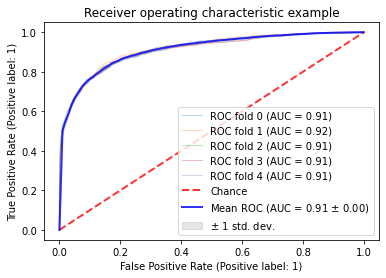

In [44]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
  
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [45]:
set(y3)

{0, 1}

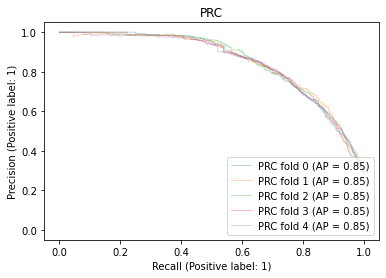

In [46]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [50]:
np.mean([0.85,0.85,0.85,0.85,0.85])

0.852

In [52]:
np.std([0.85,0.85,0.85,0.85,0.85])

0.0040000000000000036